In [1]:
import pandas as pd
import numpy as np 

In [2]:
data=pd.read_csv("tradelog.csv")

In [4]:
data

,Unnamed: 0,Ticker,Entry Time,Entry Price,Exit Time,Exit Price
0,1,BANKNIFTY09JUL2022800PE,08-07-2020 09:29,163.50,08-07-2020 13:15,301.00
1,2,BANKNIFTY09JUL2022700CE,09-07-2020 09:29,162.50,09-07-2020 10:34,166.75
2,3,BANKNIFTY09JUL2022700PE,09-07-2020 09:29,110.55,09-07-2020 10:34,147.00
3,4,BANKNIFTY16JUL2022700CE,10-07-2020 09:29,295.10,10-07-2020 15:24,437.55
4,5,BANKNIFTY16JUL2022700PE,10-07-2020 09:29,555.20,10-07-2020 15:24,403.15
...,...,...,...,...,...,...
244,245,BANKNIFTY31DEC2031300PE,29-12-2020 09:29,216.65,29-12-2020 13:10,274.60
245,246,BANKNIFTY31DEC2031200CE,30-12-2020 09:29,248.25,30-12-2020 10:24,283.90
246,247,BANKNIFTY31DEC2031200PE,30-12-2020 09:29,221.70,30-12-2020 10:24,240.10
247,248,BANKNIFTY31DEC2031300CE,31-12-2020 09:29,161.80,31-12-2020 10:37,173.85


In [14]:
data.isnull().count()

Unnamed: 0     249
Ticker         249
Entry Time     249
Entry Price    249
Exit Time      249
Exit Price     249
dtype: int64

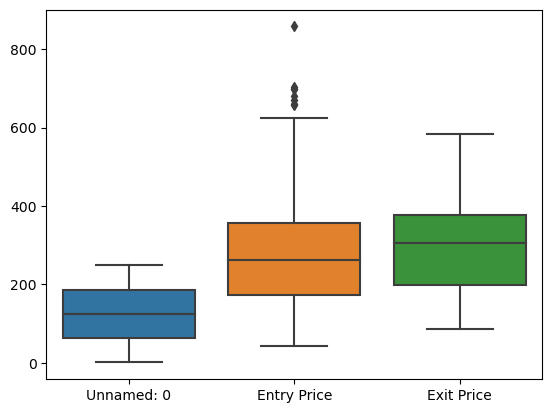

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data)
plt.show()



In [7]:
# Constants
initial_portfolio_value = 6500
risk_free_rate = 0.05  # 5%


In [9]:
len(data)

249

In [25]:
# Calculate parameters
total_trades = len(data)
profitable_trades = len(data[data['Entry Price'] < data['Exit Price']])
loss_making_trades=len(data[data['Entry Price']> data['Exit Price']])
#print(profitable_trades + loss_making_trades)
print(profitable_trades , loss_making_trades)

153 96


In [27]:
win_rate = profitable_trades / total_trades
win_rate 

0.6144578313253012

In [52]:
data['Profit/Loss'] = data['Exit Price'] - data['Entry Price']
data['Profit/Loss']

0      137.50
1        4.25
2       36.45
3      142.45
4     -152.05
        ...  
244     57.95
245     35.65
246     18.40
247     12.05
248     18.95
Name: Profit/Loss, Length: 249, dtype: float64

In [30]:
average_profit_profitable = data[data['Entry Price'] < data['Exit Price']]['Profit/Loss'].mean()
average_profit_loss_making = data[data['Entry Price'] > data['Exit Price']]['Profit/Loss'].mean()

print("Average Profit for Profitable Trades:", average_profit_profitable)
print("Average Profit for Loss-Making Trades:", average_profit_loss_making)


Average Profit for Profitable Trades: 76.09542483660131
Average Profit for Loss-Making Trades: -105.54375


In [34]:
loss_rate = 1 - win_rate
expectancy = (win_rate * average_profit_profitable) - (loss_rate * average_profit_loss_making)
print(loss_rate,expectancy)

0.3855421686746988 87.44899598393575


In [42]:
average_profit = data['Profit/Loss'][data['Entry Price'] < data['Exit Price']].mean()
average_loss = data['Profit/Loss'][data['Entry Price'] > data['Exit Price']].mean()
risk_reward_ratio = average_profit / abs(average_loss)

print('avg Profit',average_profit)
print('avg Loss',average_loss)
print('RRR',risk_reward_ratio)

avg Profit 76.09542483660131
avg Loss -105.54375
RRR 0.720984661210174


In [41]:
print(risk_reward_ratio)

0.720984661210174


In [53]:
# Calculate the daily returns
data['Daily Return'] = data['Profit/Loss'] / initial_portfolio_value

In [54]:
# Calculate the cumulative returns
data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()

In [56]:
# Calculate the standard deviation of daily returns
daily_returns = data['Daily Return']
volatility = daily_returns.std()


In [57]:
# Calculate the Sharpe Ratio
rate_of_return = (ending_value / beginning_value) ** (1 / num_periods) - 1
sharpe_ratio = (rate_of_return - risk_free_rate) / volatility

In [58]:
# Calculate the maximum drawdown
cumulative_returns = data['Cumulative Return']
max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()

In [59]:
# Calculate the max drawdown percentage
max_drawdown_percentage = max_drawdown * 100

In [60]:
# Calculate the Calmar Ratio
calmar_ratio = rate_of_return / max_drawdown

In [61]:

results = {
    "Total Trades": [total_trades],
    "Profitable Trades": [profitable_trades],
    "Loss-Making Trades": [loss_making_trades],
    "Win Rate": [win_rate],
    "Average Profit per Trade": [average_profit],
    "Average Loss per Trade": [average_loss],
    "Risk Reward Ratio": [risk_reward_ratio],
    "Expectancy": [expectancy],
    "Average ROR per Trade": [rate_of_return],
    "Sharpe Ratio": [sharpe_ratio],
    "Max Drawdown": [max_drawdown],
    "Max Drawdown Percentage": [max_drawdown_percentage],
    "CAGR": [cagr],
    "Calmar Ratio": [calmar_ratio]
}

results_df = pd.DataFrame(results)
results_df.to_csv('strategy_results1.csv', index=False)